# Библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
import networkx as nx
import pandas as pd
import csv
import json
import sys
import math
import random

# Лабораторная работа №1

##  Часть 2

### Задание 1 

In [46]:
# Задаем числа случайно
x = np.random.randint(low = -10, high = 10, size = 3)
w = np.random.randint(low = -10, high = 10, size = 3)
b = np.random.randint(low = 2, high = 10)

print('x =', x)
print('w =', w)
print('b =', b)

# Вычисление функции
func = np.dot(x, w) + b

print('\nОтвет:', func)

x = [-1  1 -8]
w = [-2 -6 -2]
b = 7

Ответ: 19


### Задание 2

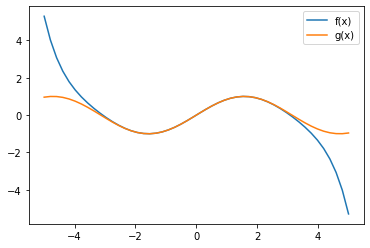

In [43]:
# Задаем функции
def f(x):
    return x - (x ** 3)/6 + (x ** 5)/120 - (x ** 7)/5040
def g(x):
    return np.sin(x)

# Интервал
x = np.linspace(-5, 5, num = 50)

# Отображение графика
plt.plot(x, f(x), label = "f(x)");
plt.plot(x, g(x), label = "g(x)");
plt.legend(loc = "upper right");

### Задание 3

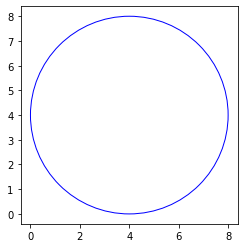

In [3]:
# Ввод радиуса
r = 4

# Создание объекта окружности (радиус r, отклонение от осей тоже r, чтобы не было отриц. координат)
circle_object = plt.Circle((r, r), r, color='b', fill=False)

# Отображение объекта
ax=plt.gca()
ax.add_patch(circle_object)
plt.axis('scaled')
plt.show()

### Задание 4

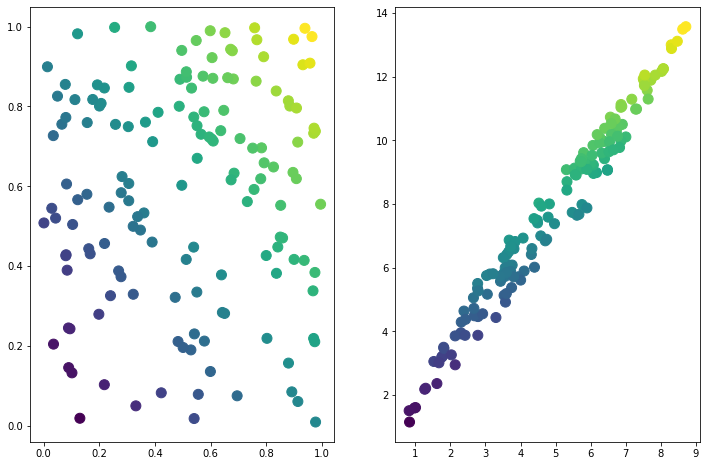

In [47]:
def transformation_plot(dots, matrix):
    # Создание 2-х форм для вывода изображения до и после преобразования
    fig, ax = plt.subplots(1, 2, figsize=(12,8))
    # Делим координаты на x и y
    x = dots[:, 0]
    y = dots[:, 1]
    
    # Для уникального цвета складываем координаты
    def color_plus(x, y):
        return x + y
    
    color = color_plus(x, y)
    
    # Отрисовка точек
    ax[0].scatter(x, y, 100, c = color)
    
    # Изменяем точки под матрицу
    transf_dots = np.dot(dots, matrix.T)
    
    transf_x = transf_dots[:, 0]
    transf_y = transf_dots[:, 1]
    
    # Отрисовка новых точек
    ax[1].scatter(transf_x, transf_y, 100, c = color)

# Вызов функции
transformation_plot(np.random.random(size=(150, 2)), np.array([[6,3],[8,6]]))

### Задание 5
Формула производной (для нахождения не аналит. выражения): 
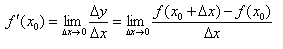

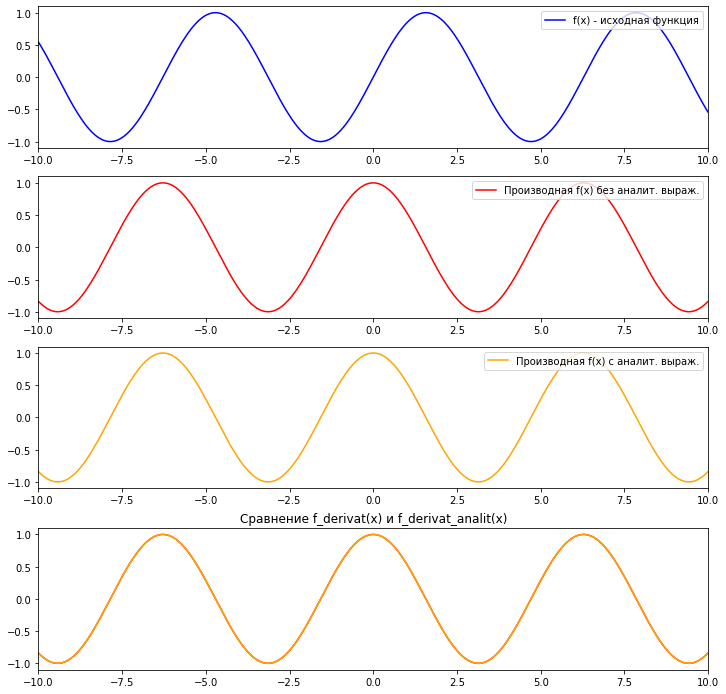

In [38]:
# Функции. f - исходная , f_derivat - производная без аналит. выражения
def f(x):
    return np.sin(x)

def f_derivat(x, delta_x = 1e-8): # так как delta_x стремится к 0 
    return (f(x + delta_x) - f(x)) / delta_x

def f_derivat_analit(x):
    return np.cos(x)

# Интервал
a = -10
b = 10

# Создание точек
x= np.linspace(a, b, 500)

# Отрисовка графиков
fig, axes = plt.subplots(4, 1, figsize = (12, 12))
plt.setp(axes, xlim=(a,b)) # растягивание графика до краев

axes[0].plot(x, f(x), label = "f(x) - исходная функция", color = "blue")
axes[0].legend(loc = "upper right")

axes[1].plot(x, f_derivat(x), label = "Производная f(x) без аналит. выраж.", color = "red")
axes[1].legend(loc = "upper right")

axes[2].plot(x, f_derivat_analit(x), label = "Производная f(x) с аналит. выраж.", color = "orange")
axes[2].legend(loc = "upper right")

pos1 = axes[2].get_position()
axes[3].set_position([pos1.x0, pos1.y0 - 0.21, pos1.width, pos1.height]) # Чтобы лучше было видно title

axes[3].plot(x, f_derivat(x), color = "red")
axes[3].plot(x, f_derivat_analit(x), color = "orange")
axes[3].set_title("Сравнение f_derivat(x) и f_derivat_analit(x)")

plt.show()

### Задание 6
Формула нахождения угла
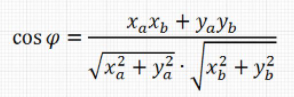

In [58]:
# Количество векторов v в V
v_amount = 100

# Исходные значения
V = np.random.uniform(-1,1,size=(v_amount, 2))
q = np.array([1,2])

# Находим отношение V к q
V_q_cos = np.dot(V,q)/(np.linalg.norm(q)*np.linalg.norm(V,axis=1)) #axis для соответствия векторов

# Находим значение угла через arccos(проверка что значения от -1 до 1)
angles = np.arccos(np.clip(V_q_cos, -1, 1))*180/np.pi # перевод в градусы

print('Пропорция v в V с углом < 90 градусов:', (angles < 90).sum()/v_amount)
print('Пропорция v в V с углом < 30 градусов:', (angles < 30).sum()/v_amount)

Пропорция v в V с углом < 90 градусов: 0.49
Пропорция v в V с углом < 30 градусов: 0.17


### Задание 7

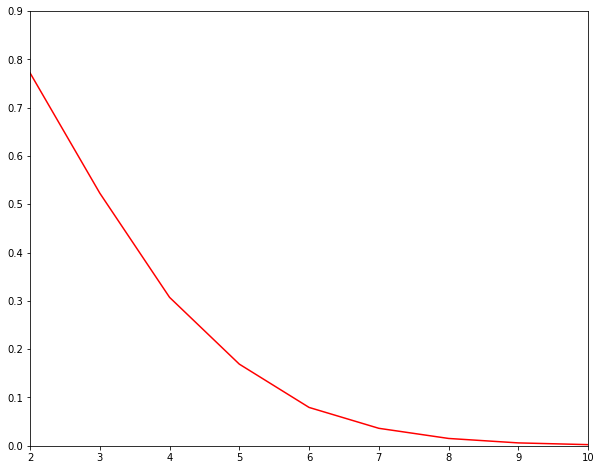

In [54]:
# Данные для отрисовки графика
result = []

# График от d=2 до d=10
for i in range(2, 11):
    dots = np.random.random(size=(5000, i))
    dots = np.sum(np.square(dots), axis=1)
    result.append((dots <= 1).sum()/5000) # в гиперсфере, если расстояние от центра <= 1
    
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_ylim(0, 0.9)
ax.set_xlim(2, 10)

ax.plot(range(2, 11), result, color = "r")
plt.show()

### Задание 8

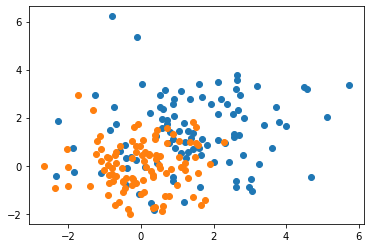

In [2]:
# Функция преобразования
def f(X):
    X -= np.mean(X, axis = 0) # вычитаем из столбцов их средние значения
    X /= np.std(X, axis = 0) # делим на стандартное отклонение в столбце
    return X

# Кол-во точек
count = 50

# Исходная матрица
X = np.random.multivariate_normal(mean=[1,2],cov=[[2,1],[1,3]], size=[count,2])

# Рисуем исходную матрицу
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

# Преобразование
a = f(X)

# Рисуем преобразованную матрицу
ax.scatter(X[:,0], X[:,1])

plt.show()

##  Часть 1

### Задание 1

In [16]:
# Загружаем данные sales.json в data
with open('sales.json') as f:
    data = json.load(f)

# Создаем титульной строку, она будет 0 элементом в таблице
title = ["ITEM,country,year,sales"]
sales_csv = [title] 

# Заполняем таблицу
for i in range(len(data)):                         # Проходимся по всем элементам data (sales.json)
    item = data[i]["item"]                         # Берем item из data    
    sales_by_country = data[i]["sales_by_country"] # Берем sales_by_country из data
    for country in sales_by_country.keys():        # В данных sales_by_country хранятся country, year, sales
        country_i = sales_by_country[country]      # Берем один из элементов страны в цикле
        for year in country_i:                     # В нем отбираем года и потом добавляем все пройденное в таблицу
            sales_csv.append(["{},{},{},{}".format(item, country, year, country_i[year])])

#df = pd.DataFrame(sales_csv, index=None, columns=[''])
#print('Пример содержания sales_new.cvs:\n', df)
#df.to_csv ('sales_new.csv', index=False, header=False)

with open('sales_new.csv', "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(sales_csv)


##  Часть 3

### Задание 1

In [5]:
# Заполняем данные из csv в dots формата ['A',3,9]
file = open('tsp2.csv', newline='')
cvs_reader = csv.reader(file)
dots = []

for dot in cvs_reader:
    dot = dot[0].split(' ') # разделяем данные в ячейки
    dot[1] = int(dot[1])
    dot[2] = int(dot[2])
    dots.append(dot)

# Функция для вычисления длины пути
def distance(a,b):
    return np.sqrt((a[1] - b[1])**2 + (a[2] - b[2])**2)

# Начальная и конечная точка (в этом случае A)
start_end_dot = dots[0]

######################################
# 1. Случайный поиск (генерация пути)#
######################################
dots_copy = dots[1:]        # Копии точек (без точки А)
path_history = []           # История пути по точкам
min_length = 10e+10         # Результат минимального значения пути
iterat_count = 1000

for index in range(iterat_count):
    path_length = 0           # длина пути текущей итерации
    random.shuffle(dots_copy) # мешаем места в последовательности точек
    path = [start_end_dot] + dots_copy + [start_end_dot]
    
    for i in range(len(path)-1):
        path_length += distance(path[i],path[i+1])
        
    if path_length < min_length:
        min_length = path_length
        path_history = [x[0] for x in path]
        
print('[Случайный поиск]\n  Мин. найденная длина пути: ', round(min_length, 2), 
      '\n  История пути:', path_history, '\n  Итераций:', iterat_count)

####################################
# 2. Жадный поиск (ближайший сосед)#
#####################################
dots_copy = dots[:] 
path_history = []
current = dots[0] # Текущая точка
total_length = 0
used_dots = {'A':1}

for index in range(len(dots)):
    path_length = [distance(current, dot) for dot in dots_copy] # ищем пути
    index_min = np.argmin(path_length)                          # отбираем минимум
    next = dots_copy.pop(index_min)
    path_history += next[0]                                     # в историю пути добавлем букву
    total_length += path_length[index_min]
    used_dots[next[0]] = 1                                      # Указываем, что эта точка уже пройдена
    current = next                                              # заканчиваем шаг, текущий = следующий

path_history += start_end_dot[0]                                # добавляем в конец А
total_length += distance(current, start_end_dot)
print('\n[Жадный поиск]\n  Мин. найденная длина пути: ', round(total_length, 2), 
      '\n  История пути:', path_history, '\n  Итераций:', 1)

[Случайный поиск]
  Мин. найденная длина пути:  76.73 
  История пути: ['A', 'P', 'K', 'U', 'T', 'B', 'R', 'D', 'E', 'O', 'L', 'C', 'S', 'M', 'I', 'J', 'G', 'H', 'F', 'N', 'A'] 
  Итераций: 1000

[Жадный поиск]
  Мин. найденная длина пути:  49.65 
  История пути: ['A', 'B', 'P', 'C', 'O', 'M', 'L', 'H', 'I', 'K', 'U', 'T', 'J', 'G', 'F', 'E', 'N', 'D', 'R', 'S', 'A'] 
  Итераций: 1


In [13]:
##########################
# 3. Метод Hill Climbing #
##########################

###########
# Функции #
###########

# Длина пути
def routeLength(matrix, path):
    routeLength = 0
    routeLength += matrix[path[-1]][path[0]]
    for i in range(len(path)-1):
        routeLength += matrix[path[i]][path[i+1]]
    return routeLength

# Поиск лучшей соседней точки
def getBestNeighbour(matrix, neighbours):
    bestRouteLength = routeLength(matrix, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(matrix, neighbour)
        if currentRouteLength < bestRouteLength: # Ищем лучшую по длинне
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

# Прокрутка всех соседних точек
def getNeighbours(path):
    neighbours = []
    for i in range(1,len(path)):                 # Первая точка в прокрутке одинаковая
        for j in range(i + 1, len(path)):
            neighbour = path.copy()
            neighbour[i] = path[j]
            neighbour[j] = path[i]
            neighbours.append(neighbour)
    return neighbours

# Выбираем случайный путь, но начало будет = 'А'
def randomPath(matrix):
    dots_list = list(range(len(matrix)))
    path = [dots_list[0]]                     # Делаем А первым
    dots_list.remove(dots_list[0])            # Убираем из списка пройденных
    
    random.shuffle(dots_list)
    path += dots_list
    
    return path

# На вход идет матрица расстояний (например [0,1,1],[1,0,1],[1,1,0])
def hillClimb(matrix):
    currentPath = randomPath(matrix)                      # создаем рандомный путь
    currentRouteLength = routeLength(matrix, currentPath) 
    neighbours = getNeighbours(currentPath)               # узнаем все соседние точки и отбираем лучшие
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(matrix, neighbours)

    while bestNeighbourRouteLength < currentRouteLength:  # пока лучшее короче текущего, будем искать еще короче
        currentPath = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentPath)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(matrix, neighbours)
    
    return currentPath, currentRouteLength

###########
# Решение #
###########

matrix = []
final_road = []
minimal_path = 10e+10
dots_copy = dots[:]
iterat_count = 4000
    
# Преобразуем найденные dots в матрицу путей (путь находим чезем distance())
for index in range(len(dots)):
    current = dots_copy[index]                                   # от выбранной точки
    path_length = [distance(current, dot) for dot in dots_copy]  # смотрим все расстояния к другим
    matrix.append(path_length)

if (iterat_count > 800):
    print ('Загрузка...')

# Вызываем алгоритм Hill Climb в указанном кол-ве итераций
for i in range(iterat_count):
    currentPath, currentRouteLength = hillClimb(matrix)
    
    if (currentRouteLength < minimal_path):
        final_road = currentPath 
        minimal_path = currentRouteLength

# Цифры точек превращаем в буквы
final_road.append(final_road[0])
ans_road = []

for index in range(len(final_road)):
    current = dots[final_road[index]]
    ans_road.append(current[0])
    
print('\n[Метод Hill Climbing]\n  Мин. найденная длина пути: ', minimal_path, 
      '\n  История пути:', ans_road, '\n  Итераций:', iterat_count)

Загрузка...

[Метод Hill Climbing]
  Мин. найденная длина пути:  45.45744243796088 
  История пути: ['A', 'S', 'B', 'P', 'R', 'D', 'C', 'O', 'M', 'N', 'E', 'F', 'G', 'H', 'L', 'K', 'I', 'J', 'T', 'U', 'A'] 
  Итераций: 4000
